In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
file_path = "/content/drive/MyDrive/Data_Ingestion_System/online_retail_II (1).xlsx"  # Update the folder path if needed
df = pd.read_excel(file_path, sheet_name="Year 2009-2010")

In [12]:
import pandas as pd
import os



df = df.reset_index(drop=True)

vendor_a = df.iloc[:50].copy()

# Rename columns to standardized format
vendor_a = vendor_a.rename(columns={
    "Invoice": "invoice_id",
    "StockCode": "product_code",
    "Description": "product_name",
    "Quantity": "qty",
    "Price": "unit_price",
    "Customer ID": "customer_id",
    "InvoiceDate": "transaction_date"
})

vendor_a = vendor_a[[
    "invoice_id", "product_code", "product_name",
    "qty", "unit_price", "customer_id", "transaction_date"
]]

# Inject missing values randomly
vendor_a.loc[10, "unit_price"] = None
vendor_a.loc[20, "customer_id"] = None
vendor_a.loc[30, "product_name"] = None


vendor_a.to_csv("vendor_A.csv", index=False)

vendor_b = df.iloc[50:100].copy()

# Rename columns to simulate alternate schema
vendor_b = vendor_b.rename(columns={
    "Invoice": "invno",
    "StockCode": "code",
    "Description": "item_name",
    "Quantity": "quantity",
    "Price": "price",
    "Customer ID": "cust_id",
    "InvoiceDate": "date"
})

vendor_b = vendor_b[[
    "invno", "code", "item_name",
    "quantity", "price", "cust_id", "date"
]]

# Inject anomalies
vendor_b.loc[5, "quantity"] = -9999  # negative quantity
vendor_b.loc[15, "price"] = None     # missing price
vendor_b.loc[25, "cust_id"] = None   # missing customer
vendor_b.loc[35, "item_name"] = "###"  # bad product name
vendor_b.loc[45, "price"] = 0.0001     # suspiciously low price

# Save CSV
vendor_b.to_csv("vendor_B.csv", index=False)

print("✅ vendor_A.csv and vendor_B.csv saved with 50 rows each and injected errors.")


✅ vendor_A.csv and vendor_B.csv saved with 50 rows each and injected errors.


In [13]:
import pandas as pd

def read_csv(file_path: str) -> pd.DataFrame:
    """
    Read a CSV file and return a DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"✅ Loaded {file_path} with {len(df)} rows and {len(df.columns)} columns.")
        return df
    except Exception as e:
        print(f"❌ Error reading {file_path}: {e}")
        return pd.DataFrame()


In [14]:
df_a = read_csv("vendor_A.csv")
df_b = read_csv("vendor_B.csv")

df_a.head()


✅ Loaded vendor_A.csv with 50 rows and 7 columns.
✅ Loaded vendor_B.csv with 55 rows and 7 columns.


,invoice_id,product_code,product_name,qty,unit_price,customer_id,transaction_date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,2009-12-01 07:45:00


In [15]:
import pandas as pd
import sqlite3


In [16]:
# Load vendor_B CSV
vendor_b = pd.read_csv("vendor_B.csv")

# Connect to in-memory SQLite DB
conn = sqlite3.connect(":memory:")

# Write the DataFrame as a SQL table
vendor_b.to_sql("vendor_b_table", conn, index=False, if_exists="replace")

print("✅ Table 'vendor_b_table' created in SQLite.")


✅ Table 'vendor_b_table' created in SQLite.


In [17]:
def read_sql_table(conn, table_name):
    try:
        df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
        print(f"✅ Loaded table '{table_name}' with {len(df)} rows.")
        return df
    except Exception as e:
        print(f"❌ SQL read error: {e}")
        return pd.DataFrame()


In [18]:
df_sql = read_sql_table(conn, "vendor_b_table")
df_sql.head()


✅ Loaded table 'vendor_b_table' with 55 rows.


,invno,code,item_name,quantity,price,cust_id,date
0,489437.0,22274,FELTCRAFT DOLL EMILY,6.0,2.95,15362.0,2009-12-01 09:08:00
1,489437.0,21912,VINTAGE SNAKES & LADDERS,4.0,3.75,15362.0,2009-12-01 09:08:00
2,489437.0,22111,SCOTTIE DOG HOT WATER BOTTLE,3.0,4.95,15362.0,2009-12-01 09:08:00
3,489437.0,22112,CHOCOLATE HOT WATER BOTTLE,3.0,4.95,15362.0,2009-12-01 09:08:00
4,489438.0,21329,DINOSAURS WRITING SET,28.0,0.98,18102.0,2009-12-01 09:24:00


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os

# project directory inside Drive
project_path = "/content/drive/MyDrive/Data_Ingestion_System"
os.makedirs(project_path, exist_ok=True)


In [21]:
#vendor_A.csv
vendor_a.to_csv(f"{project_path}/vendor_A.csv", index=False)

#vendor_B.csv
vendor_b.to_csv(f"{project_path}/vendor_B.csv", index=False)

print("✅ Both CSVs saved to Google Drive under 'Data_Ingestion_System' folder.")


✅ Both CSVs saved to Google Drive under 'Data_Ingestion_System' folder.


In [22]:
import sqlite3

# Save to Google Drive instead of RAM
sql_path = f"{project_path}/retail.db"  # or any name you like
conn = sqlite3.connect(sql_path)

# Save vendor_b to the DB
vendor_b.to_sql("vendor_b_table", conn, index=False, if_exists="replace")

print(f"✅ SQLite DB saved at {sql_path}")


✅ SQLite DB saved at /content/drive/MyDrive/Data_Ingestion_System/retail.db


In [23]:
import pandas as pd
import json



df = df.dropna(subset=["Invoice", "StockCode", "Description", "Quantity", "Price", "Customer ID", "InvoiceDate", "Country"])
df = df.reset_index(drop=True)


df_sample = df.iloc[100:150].copy()
df_sample = df_sample.reset_index(drop=True)

# Convert to nested JSON with anomalies
nested_json = []
for i, row in df_sample.iterrows():
    # Inject anomalies at specific rows
    quantity = int(row["Quantity"])
    price = float(row["Price"])
    product_name = row["Description"]
    customer_id = str(int(row["Customer ID"]))

    if i == 5:
        price = None
    elif i == 10:
        quantity = -9999
    elif i == 15:
        product_name = "###INVALID###"
    elif i == 20:
        price = 0.0001
    elif i == 25:
        customer_id = None

    record = {
        "order_id": str(row["Invoice"]),
        "product": {
            "sku": str(row["StockCode"]),
            "name": product_name
        },
        "customer": {
            "id": customer_id,
            "country": row["Country"]
        },
        "quantity": quantity,
        "price": price,
        "date": str(row["InvoiceDate"])
    }

    nested_json.append(record)

# Save to Drive
nested_json_path = f"{project_path}/nested_retail_50_anomalies.json"
with open(nested_json_path, "w") as f:
    json.dump(nested_json, f, indent=2)

print("✅ nested_retail_50_anomalies.json saved to Google Drive.")


✅ nested_retail_50_anomalies.json saved to Google Drive.


In [24]:
with open(f"{project_path}/nested_retail_50_anomalies.json", "r") as f:
    json_text = f.read()

print(json_text)


[
  {
    "order_id": "489442",
    "product": {
      "sku": "22271",
      "name": "FELTCRAFT DOLL ROSIE"
    },
    "customer": {
      "id": "13635",
      "country": "United Kingdom"
    },
    "quantity": 6,
    "price": 2.95,
    "date": "2009-12-01 09:46:00"
  },
  {
    "order_id": "489442",
    "product": {
      "sku": "22272",
      "name": "FELTCRAFT DOLL MARIA"
    },
    "customer": {
      "id": "13635",
      "country": "United Kingdom"
    },
    "quantity": 6,
    "price": 2.95,
    "date": "2009-12-01 09:46:00"
  },
  {
    "order_id": "489442",
    "product": {
      "sku": "85123A",
      "name": "WHITE HANGING HEART T-LIGHT HOLDER"
    },
    "customer": {
      "id": "13635",
      "country": "United Kingdom"
    },
    "quantity": 6,
    "price": 2.95,
    "date": "2009-12-01 09:46:00"
  },
  {
    "order_id": "489442",
    "product": {
      "sku": "21582",
      "name": "KINGS CHOICE SMALL TUBE MATCHES"
    },
    "customer": {
      "id": "13635",
      "cou

In [25]:
import requests
from pandas import json_normalize

url = "https://api.npoint.io/80eff31f30e17d615a3c"  # replace with real ID


response = requests.get(url)


try:
    data = response.json()
    print("✅ JSON loaded successfully.")


    df_api_flat = json_normalize(data)
    print("✅ DataFrame shape:", df_api_flat.shape)
    display(df_api_flat.head())

except Exception as e:
    print("❌ Error parsing JSON:", e)


✅ JSON loaded successfully.
✅ DataFrame shape: (50, 8)


,date,price,order_id,quantity,product.sku,product.name,customer.id,customer.country
0,2009-12-01 09:46:00,2.95,489442,6,22271,FELTCRAFT DOLL ROSIE,13635,United Kingdom
1,2009-12-01 09:46:00,2.95,489442,6,22272,FELTCRAFT DOLL MARIA,13635,United Kingdom
2,2009-12-01 09:46:00,2.95,489442,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,13635,United Kingdom
3,2009-12-01 09:46:00,1.65,489442,20,21582,KINGS CHOICE SMALL TUBE MATCHES,13635,United Kingdom
4,2009-12-01 09:46:00,2.55,489442,12,21586,KINGS CHOICE GIANT TUBE MATCHES,13635,United Kingdom


In [26]:
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
# Unified schema (covers CSV + JSON)
target_schema = [
    "invoice_id",
    "product_code",
    "product_name",
    "qty",
    "unit_price",
    "customer_id",
    "transaction_date",
    "customer_country"
]


In [28]:
def map_schema_columns(input_columns, target_schema, model, verbose=True):
    input_embeddings = model.encode(input_columns, convert_to_tensor=True)
    target_embeddings = model.encode(target_schema, convert_to_tensor=True)

    mapping = {}
    for i, col in enumerate(input_columns):
        sims = util.cos_sim(input_embeddings[i], target_embeddings)
        best_match_idx = sims.argmax().item()
        best_score = sims[0][best_match_idx].item()
        best_match = target_schema[best_match_idx]
        mapping[col] = {
            "match": best_match,
            "score": round(best_score, 2)
        }
        if verbose:
            print(f"🔁 {col} → {best_match} (score: {best_score:.2f})")
    return mapping


In [29]:
df_csv = pd.read_csv(f"{project_path}/vendor_A.csv")
csv_map = map_schema_columns(df_csv.columns, target_schema, model)


🔁 invoice_id → invoice_id (score: 1.00)
🔁 product_code → product_code (score: 1.00)
🔁 product_name → product_name (score: 1.00)
🔁 qty → qty (score: 1.00)
🔁 unit_price → unit_price (score: 1.00)
🔁 customer_id → customer_id (score: 1.00)
🔁 transaction_date → transaction_date (score: 1.00)


In [30]:
df_sql = pd.read_sql("SELECT * FROM vendor_b_table", conn)
sql_map = map_schema_columns(df_sql.columns, target_schema, model)


🔁 invno → invoice_id (score: 0.25)
🔁 code → product_code (score: 0.56)
🔁 item_name → product_name (score: 0.66)
🔁 quantity → qty (score: 0.49)
🔁 price → unit_price (score: 0.50)
🔁 cust_id → customer_id (score: 0.59)
🔁 date → transaction_date (score: 0.57)


In [31]:
# Assuming df_api_flat already created via json_normalize
api_map = map_schema_columns(df_api_flat.columns, target_schema, model)


🔁 date → transaction_date (score: 0.57)
🔁 price → unit_price (score: 0.50)
🔁 order_id → invoice_id (score: 0.57)
🔁 quantity → qty (score: 0.49)
🔁 product.sku → product_name (score: 0.44)
🔁 product.name → product_name (score: 0.73)
🔁 customer.id → customer_id (score: 0.88)
🔁 customer.country → customer_country (score: 0.91)


In [32]:
def detect_unmapped_targets(mapping_dict, target_schema):
    mapped_values = [v['match'] for v in mapping_dict.values()]
    missing_targets = [t for t in target_schema if t not in mapped_values]
    return missing_targets


In [33]:
# For CSV
df_csv = pd.read_csv(f"{project_path}/vendor_A.csv")
csv_map = map_schema_columns(df_csv.columns.tolist(), target_schema, model)

# For SQL
df_sql = pd.read_sql("SELECT * FROM vendor_b_table", conn)
sql_map = map_schema_columns(df_sql.columns.tolist(), target_schema, model)

# For API
api_map = map_schema_columns(df_api_flat.columns.tolist(), target_schema, model)


🔁 invoice_id → invoice_id (score: 1.00)
🔁 product_code → product_code (score: 1.00)
🔁 product_name → product_name (score: 1.00)
🔁 qty → qty (score: 1.00)
🔁 unit_price → unit_price (score: 1.00)
🔁 customer_id → customer_id (score: 1.00)
🔁 transaction_date → transaction_date (score: 1.00)
🔁 invno → invoice_id (score: 0.25)
🔁 code → product_code (score: 0.56)
🔁 item_name → product_name (score: 0.66)
🔁 quantity → qty (score: 0.49)
🔁 price → unit_price (score: 0.50)
🔁 cust_id → customer_id (score: 0.59)
🔁 date → transaction_date (score: 0.57)
🔁 date → transaction_date (score: 0.57)
🔁 price → unit_price (score: 0.50)
🔁 order_id → invoice_id (score: 0.57)
🔁 quantity → qty (score: 0.49)
🔁 product.sku → product_name (score: 0.44)
🔁 product.name → product_name (score: 0.73)
🔁 customer.id → customer_id (score: 0.88)
🔁 customer.country → customer_country (score: 0.91)


In [34]:
def apply_st_mapping(df, st_mapping, threshold=0.5):
    rename_dict = {}
    targets_used = set(df.columns)

    for col, match in st_mapping.items():
        if match["score"] >= threshold:
            target = match["match"]
            if target not in targets_used:
                rename_dict[col] = target
                targets_used.add(target)
            else:
                print(f"⚠️ Skipping rename {col} → {target} (already exists or already used in mapping)")

    df_renamed = df.rename(columns=rename_dict)
    df_renamed = df_renamed.loc[:, ~df_renamed.columns.duplicated()].copy()

    return df_renamed, rename_dict


In [35]:
df_csv_renamed, rename_csv = apply_st_mapping(df_csv, csv_map)
df_sql_renamed, rename_sql = apply_st_mapping(df_sql, sql_map)
df_api_renamed, rename_api = apply_st_mapping(df_api_flat, api_map)


⚠️ Skipping rename invoice_id → invoice_id (already exists or already used in mapping)
⚠️ Skipping rename product_code → product_code (already exists or already used in mapping)
⚠️ Skipping rename product_name → product_name (already exists or already used in mapping)
⚠️ Skipping rename qty → qty (already exists or already used in mapping)
⚠️ Skipping rename unit_price → unit_price (already exists or already used in mapping)
⚠️ Skipping rename customer_id → customer_id (already exists or already used in mapping)
⚠️ Skipping rename transaction_date → transaction_date (already exists or already used in mapping)


In [36]:
print("🔁 CSV Renamed Columns:", rename_csv)
print("🔁 SQL Renamed Columns:", rename_sql)
print("🔁 API Renamed Columns:", rename_api)


🔁 CSV Renamed Columns: {}
🔁 SQL Renamed Columns: {'code': 'product_code', 'item_name': 'product_name', 'price': 'unit_price', 'cust_id': 'customer_id', 'date': 'transaction_date'}
🔁 API Renamed Columns: {'date': 'transaction_date', 'price': 'unit_price', 'order_id': 'invoice_id', 'product.name': 'product_name', 'customer.id': 'customer_id', 'customer.country': 'customer_country'}


In [37]:
print(df_csv_renamed.columns[df_csv_renamed.columns.duplicated()].tolist())
print(df_sql_renamed.columns[df_sql_renamed.columns.duplicated()].tolist())
print(df_api_renamed.columns[df_api_renamed.columns.duplicated()].tolist())


[]
[]
[]


In [38]:
def get_renamed_targets(rename_dict, target_schema):
    return sorted([v for v in rename_dict.values() if v in target_schema])


In [39]:
csv_mapped = get_renamed_targets(rename_csv, target_schema)
sql_mapped = get_renamed_targets(rename_sql, target_schema)
api_mapped = get_renamed_targets(rename_api, target_schema)

print("✅ CSV mapped fields:", csv_mapped)
print("✅ SQL mapped fields:", sql_mapped)
print("✅ API mapped fields:", api_mapped)


✅ CSV mapped fields: []
✅ SQL mapped fields: ['customer_id', 'product_code', 'product_name', 'transaction_date', 'unit_price']
✅ API mapped fields: ['customer_country', 'customer_id', 'invoice_id', 'product_name', 'transaction_date', 'unit_price']


In [40]:
def get_missing_targets(mapped_fields, target_schema):
    return sorted(set(target_schema) - set(mapped_fields))


In [41]:
missing_csv = get_missing_targets(csv_mapped, target_schema)
missing_sql = get_missing_targets(sql_mapped, target_schema)
missing_api = get_missing_targets(api_mapped, target_schema)

print("❗ Missing in CSV:", missing_csv)
print("❗ Missing in SQL:", missing_sql)
print("❗ Missing in API:", missing_api)


❗ Missing in CSV: ['customer_country', 'customer_id', 'invoice_id', 'product_code', 'product_name', 'qty', 'transaction_date', 'unit_price']
❗ Missing in SQL: ['customer_country', 'invoice_id', 'qty']
❗ Missing in API: ['product_code', 'qty']


In [42]:
def get_fallback_tasks(st_mapping, df, source_name, target_schema, threshold=0.5, sample_size=5):
    tasks = []
    for col, m in st_mapping.items():
        if m["score"] < threshold:
            samples = df[col].dropna().astype(str).unique().tolist()[:sample_size]
            tasks.append({
                "source": source_name,
                "source_column": col,
                "mapped_to": m["match"],
                "score": m["score"],
                "sample_values": samples
            })
    return tasks


In [43]:
csv_fallbacks = get_fallback_tasks(csv_map, df_csv, "CSV", target_schema)
sql_fallbacks = get_fallback_tasks(sql_map, df_sql, "SQL", target_schema)
api_fallbacks = get_fallback_tasks(api_map, df_api_flat, "API", target_schema)

all_fallbacks = csv_fallbacks + sql_fallbacks + api_fallbacks


In [44]:
import requests
import os

GROQ_API_KEY = "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"
def query_groq(prompt, model="llama3-8b-8192"):
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {GROQ_API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": model,
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.2,
        "max_tokens": 50
    }

    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"].strip()
    else:
        print(f"❌ Error {response.status_code}: {response.text[:200]}")
        return None


In [45]:
def build_groq_prompt(task, target_schema):
    return f"""
You are a schema matching assistant.

Given the source column: "{task['source_column']}"
And sample values: {task['sample_values']}

Which of the following standardized schema fields is the best match?
{target_schema}

Respond with **only one** field name from the list. If none match, respond with "NO_MATCH".
"""


In [46]:
import re

def run_llm_fallback_mapping_groq(all_fallbacks, target_schema):
    corrected_map = {}

    for task in all_fallbacks:
        print(f"\n🔍 Matching column: {task['source_column']} (source: {task['source']})")
        prompt = build_groq_prompt(task, target_schema)
        answer = query_groq(prompt)

        # Normalize and extract a clean field from the LLM response
        if not answer:
            print(f"❌ No valid response from LLM")
            continue

        # Try to find one of the valid target fields in the answer
        field_pattern = r"\b(" + "|".join(re.escape(f) for f in target_schema) + r")\b"
        match = re.search(field_pattern, answer)

        if match:
            matched_field = match.group(1)
            print(f"✅ Suggested: {task['source_column']} → {matched_field}")
            corrected_map[task['source_column']] = matched_field
        elif "NO_MATCH" in answer.upper():
            print(f"⚠️ No match found for: {task['source_column']}")
        else:
            print(f"❌ Invalid or unexpected response: {answer}")

    return corrected_map


In [47]:
corrected_mappings = run_llm_fallback_mapping_groq(all_fallbacks, target_schema)



🔍 Matching column: invno (source: SQL)
✅ Suggested: invno → invoice_id

🔍 Matching column: quantity (source: SQL)
✅ Suggested: quantity → qty

🔍 Matching column: quantity (source: API)
✅ Suggested: quantity → qty

🔍 Matching column: product.sku (source: API)
✅ Suggested: product.sku → product_code


In [48]:
def apply_final_mapping(df, mapping_dict, target_schema, source_name):
    df_clean = df.copy()
    rename_dict = {}

    # Rename columns based on mapping
    for old_col, new_col in mapping_dict.items():
        if old_col in df_clean.columns:
            if new_col not in df_clean.columns:
                rename_dict[old_col] = new_col
            else:
                print(f"⚠️ Skipping rename {old_col} → {new_col} (already exists)")

    df_clean = df_clean.rename(columns=rename_dict)

    # Drop duplicates
    df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()].copy()

    # Ensure all target columns exist
    for col in target_schema:
        if col not in df_clean.columns:
            df_clean[col] = None


    df_clean['source'] = source_name

    return df_clean, rename_dict


In [49]:
# Merge sentence-transformer renames + LLM fallback mappings
final_sql_map = {**rename_sql, **corrected_mappings}
final_api_map = {**rename_api, **corrected_mappings}


In [50]:
df_sql_final, _ = apply_final_mapping(df_sql, final_sql_map, target_schema, "SQL")
df_api_final, _ = apply_final_mapping(df_api_flat, final_api_map, target_schema, "API")


In [51]:
def ensure_columns_exist(df, required_cols):
    for col in required_cols:
        if col not in df.columns:
            df[col] = None
    return df


In [52]:
columns_to_keep = target_schema + ['source']

df_csv = ensure_columns_exist(df_csv, columns_to_keep)
df_sql_final = ensure_columns_exist(df_sql_final, columns_to_keep)
df_api_final = ensure_columns_exist(df_api_final, columns_to_keep)


In [53]:
df_merged = pd.concat([
    df_csv[columns_to_keep],
    df_sql_final[columns_to_keep],
    df_api_final[columns_to_keep]
], ignore_index=True)


In [54]:
# Show all rows (temporarily increase display limit)
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(df_merged)


,invoice_id,product_code,product_name,qty,unit_price,customer_id,transaction_date,customer_country,source
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,6.9500,13085.0,2009-12-01 07:45:00,None,None
1,489434,79323P,PINK CHERRY LIGHTS,12.0,6.7500,13085.0,2009-12-01 07:45:00,None,None
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,6.7500,13085.0,2009-12-01 07:45:00,None,None
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2.1000,13085.0,2009-12-01 07:45:00,None,None
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,1.2500,13085.0,2009-12-01 07:45:00,None,None
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.0,1.6500,13085.0,2009-12-01 07:45:00,None,None
6,489434,21871,SAVE THE PLANET MUG,24.0,1.2500,13085.0,2009-12-01 07:45:00,None,None
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,5.9500,13085.0,2009-12-01 07:45:00,None,None
8,489435,22350,CAT BOWL,12.0,2.5500,13085.0,2009-12-01 07:46:00,None,None
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12.0,3.7500,13085.0,2009-12-01 07:46:00,None,None


In [55]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
import pandas as pd

# 1. Rule-based validation
def validate_records(df):
    issues = []
    for i, row in df.iterrows():
        problems = []
        if pd.isnull(row['qty']) or row['qty'] <= 0:
            problems.append("invalid_qty")
        if pd.isnull(row['unit_price']) or row['unit_price'] <= 0.01:
            problems.append("suspicious_price")
        if pd.isnull(row['product_name']) or '###' in str(row['product_name']):
            problems.append("bad_product_name")
        if pd.isnull(row['customer_id']):
            problems.append("missing_customer_id")
        if pd.isnull(row['transaction_date']):
            problems.append("missing_date")
              # Regex 1: invoice_id should be numeric only
        if pd.notnull(row.get('invoice_id')) and not re.fullmatch(r'\d+', str(row['invoice_id'])):
            problems.append("invalid_invoice_format")

        # Regex 2: product_code should be alphanumeric (no symbols)
        if pd.notnull(row.get('product_code')) and not re.fullmatch(r'[A-Za-z0-9]+', str(row['product_code'])):
            problems.append("invalid_product_code_format")
        issues.append(problems)

    df['validation_issues'] = issues
    df['issue_count'] = df['validation_issues'].apply(len)
    return df


# 2. KNN-based imputation with flagging
def knn_impute(df, cols):
    original_na = df[cols].isna().astype(int)
    imputer = KNNImputer(n_neighbors=3)
    df[cols] = imputer.fit_transform(df[cols])
    for col in cols:
        df[f"{col}_imputed"] = (original_na[col] & df[col].notna()).astype(int)
    return df


# 3. Isolation Forest anomaly detection
def detect_anomalies(df, cols):
    iso = IsolationForest(contamination=0.1, random_state=5)
    df['anomaly'] = iso.fit_predict(df[cols])
    df['anomaly'] = df['anomaly'].map({-1: "anomaly", 1: "normal"})
    return df


# 4. Quality layer classification (Gold/Silver/Manual Review)
def classify_quality(df):
    def route(row):
        if row['issue_count'] == 0 and row['anomaly'] == 'normal':
            if row.get('qty_imputed', 0) == 0 and row.get('unit_price_imputed', 0) == 0:
                return 'Gold'
            else:
                return 'Silver'
        elif row['issue_count'] <= 1 or row['anomaly'] == 'anomaly':
            return 'Silver'
        else:
            return 'Manual Review'

    df['quality_layer'] = df.apply(route, axis=1)
    return df


# 5. Unified validation pipeline
def run_validation_pipeline(df):
    df = validate_records(df)
    df = knn_impute(df, ['qty', 'unit_price'])
    df = detect_anomalies(df, ['qty', 'unit_price'])
    df = classify_quality(df)
    return df


In [56]:
import pandas as pd

# Remove limits to show ALL columns and ALL rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_validated = run_validation_pipeline(df_merged)

# Show full DataFrame (all rows, all columns)
display(df_validated)



,invoice_id,product_code,product_name,qty,unit_price,customer_id,transaction_date,customer_country,source,validation_issues,issue_count,qty_imputed,unit_price_imputed,anomaly,quality_layer
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.000000,6.950000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
1,489434,79323P,PINK CHERRY LIGHTS,12.000000,6.750000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
2,489434,79323W,WHITE CHERRY LIGHTS,12.000000,6.750000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.000000,2.100000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.000000,1.250000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.000000,1.650000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
6,489434,21871,SAVE THE PLANET MUG,24.000000,1.250000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.000000,5.950000,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
8,489435,22350,CAT BOWL,12.000000,2.550000,13085.0,2009-12-01 07:46:00,None,None,[],0,0,0,normal,Gold
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12.000000,3.750000,13085.0,2009-12-01 07:46:00,None,None,[],0,0,0,normal,Gold


In [57]:
df_validated[df_validated['quality_layer'] == 'Gold'].to_csv("gold_layer.csv", index=False)
df_validated[df_validated['quality_layer'] == 'Silver'].to_csv("silver_layer.csv", index=False)
df_validated[df_validated['quality_layer'] == 'Manual Review'].to_csv("manual_review.csv", index=False)


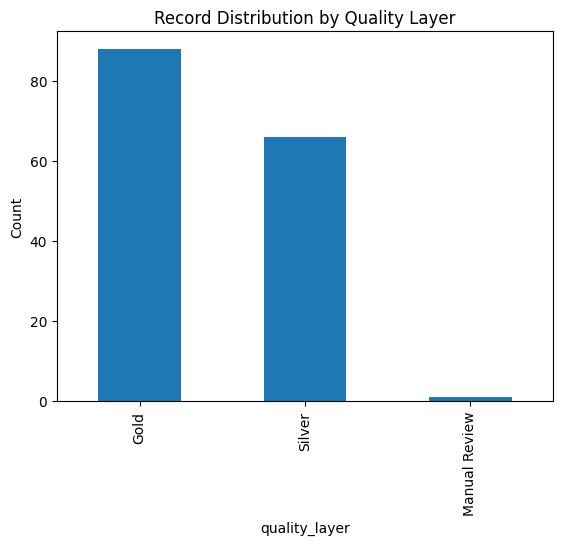

In [58]:
import matplotlib.pyplot as plt

df_validated['quality_layer'].value_counts().plot(kind='bar', title="Record Distribution by Quality Layer")
plt.ylabel("Count")
plt.show()


In [59]:
for layer in ['Gold', 'Silver', 'Manual Review']:
    print(f"\n=== {layer} Examples ===")
    display(df_validated[df_validated['quality_layer'] == layer].head(3))



=== Gold Examples ===


,invoice_id,product_code,product_name,qty,unit_price,customer_id,transaction_date,customer_country,source,validation_issues,issue_count,qty_imputed,unit_price_imputed,anomaly,quality_layer
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,6.95,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
1,489434,79323P,PINK CHERRY LIGHTS,12.0,6.75,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,6.75,13085.0,2009-12-01 07:45:00,None,None,[],0,0,0,normal,Gold



=== Silver Examples ===


,invoice_id,product_code,product_name,qty,unit_price,customer_id,transaction_date,customer_country,source,validation_issues,issue_count,qty_imputed,unit_price_imputed,anomaly,quality_layer
10,489435,22195,HEART MEASURING SPOONS LARGE,24.0,0.983333,13085.0,2009-12-01 07:46:00,None,None,[suspicious_price],1,0,1,normal,Silver
20,489436,22109,FULL ENGLISH BREAKFAST PLATE,16.0,3.390000,NaN,2009-12-01 09:06:00,None,None,[missing_customer_id],1,0,0,normal,Silver
30,489436,22111,NaN,24.0,4.250000,13078.0,2009-12-01 09:06:00,None,None,[bad_product_name],1,0,0,normal,Silver



=== Manual Review Examples ===


,invoice_id,product_code,product_name,qty,unit_price,customer_id,transaction_date,customer_country,source,validation_issues,issue_count,qty_imputed,unit_price_imputed,anomaly,quality_layer
104,NaN,None,None,28.333333,0.0001,NaN,None,None,SQL,"[invalid_qty, suspicious_price, bad_product_na...",5,1,0,normal,Manual Review
